In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
# Load the dataset (ensure you have a CSV or a dataframe with sentences and categories)
# Assuming the dataset has columns 'sentence' and 'category'
# For this example, you will replace the path with your own dataset file path
data = pd.read_csv('Final_collected_data/ready_ready.csv', sep=';')

In [5]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Line,Category,processed_quotes
0,ابتسامتك الودية تفتح القلوب,التودّد,"['ابتسامتك', 'ودة', 'فتح', 'قلب']"
1,عند ينابيع البِر تروي الأرواح ظمأها,البِر,"['ابع', 'لبر', 'تري', 'روح', 'ظمأ']"
2,اترك الأمور الصغيرة تمر,التغافل,"['اتر', 'امر', 'صغر', 'تمر']"
3,اترك الأشياء التي لا تعنيك وتغافل,التغافل,"['اتر', 'شيء', 'عنك', 'غفل']"
4,اترك الصغائر وركز على الأمور الأهم,التغافل,"['اتر', 'صغير', 'ركز', 'علي', 'امر', 'اهم']"


In [6]:
data.describe()

,Line,Category,processed_quotes
count,7280,7280,7280
unique,6819,23,6705
top,البشاشة تجعلنا أكثر سعادة,البَشاشة,"['بشش', 'جعل', 'سعد']"
freq,12,699,12


In [7]:
# Split the data into features (X) and target (y)
X = data['processed_quotes']
y = data['Category']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Convert the sentences into numerical format using TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on dataset size
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [10]:
# Train a Logistic Regression model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

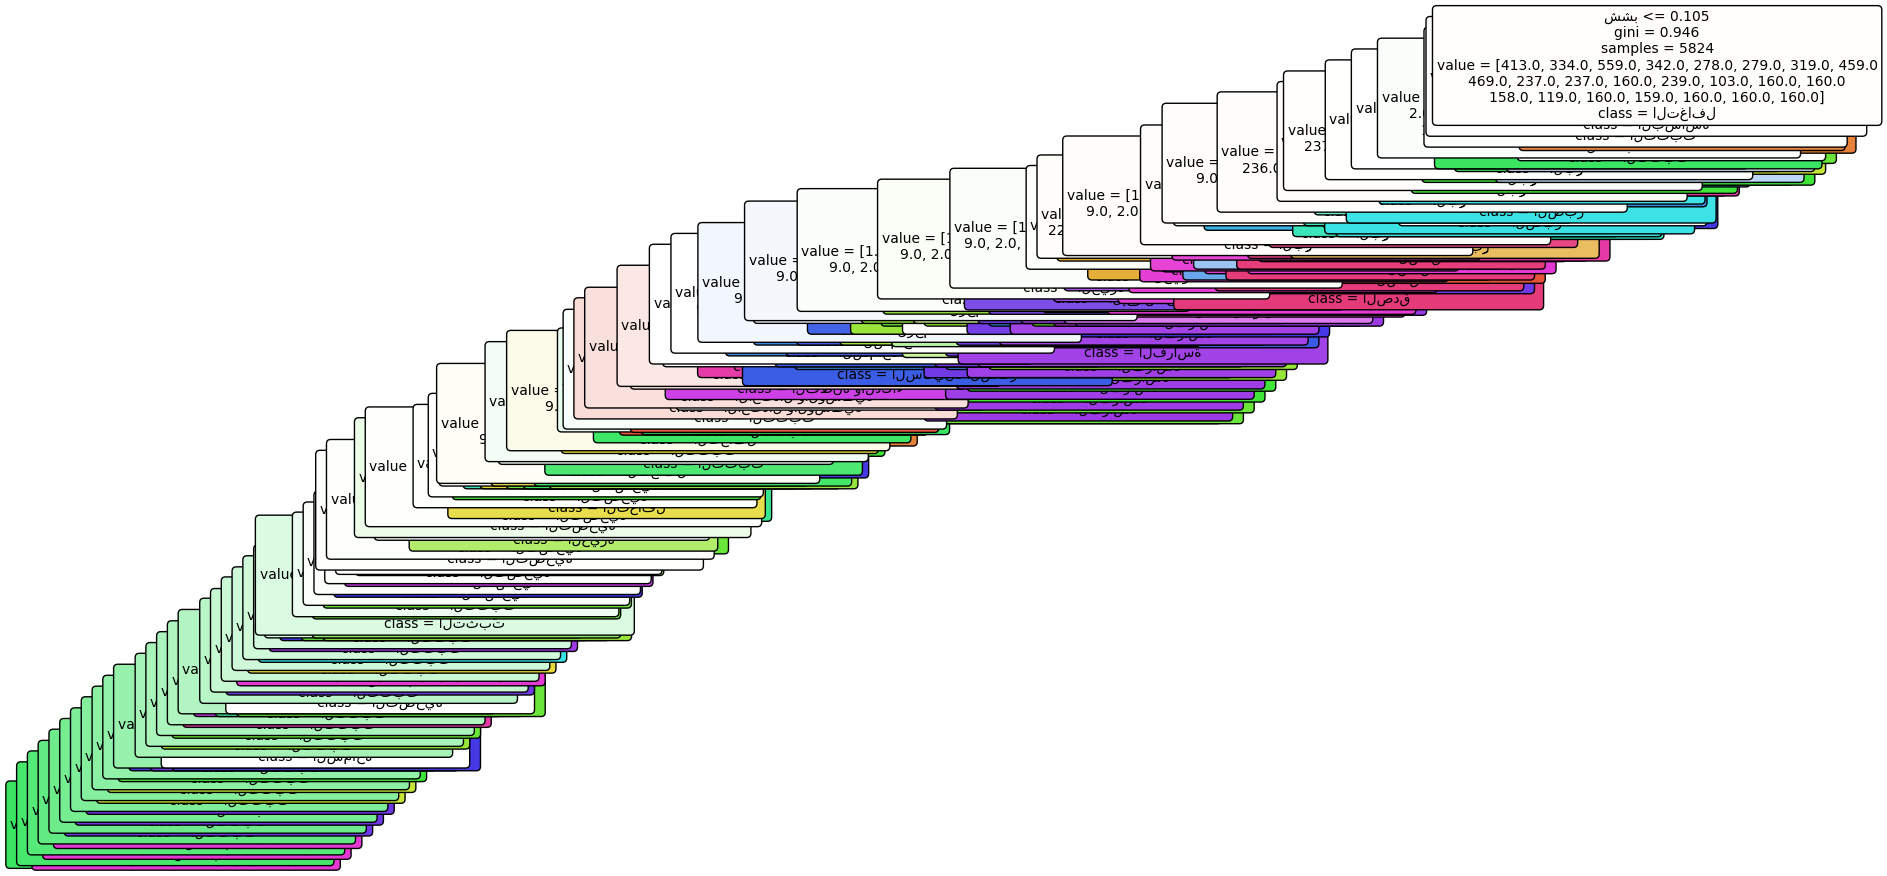

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=[get_display(arabic_reshaper.reshape(label)) for label in tfidf_vectorizer.get_feature_names_out()], class_names=data['Category'].unique(), rounded=True, fontsize=10)
plt.show()

In [12]:
# Predict the categories on the test set
y_pred = decision_tree_model.predict(X_test_tfidf)

In [13]:
from sklearn.metrics import root_mean_squared_error

In [14]:
# Evaluate the model performance using classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

      الإعراض عن الجاهلين       1.00      0.99      1.00       103
       الاعتدال والوسطيّة       0.98      1.00      0.99        84
                 البَشاشة       0.99      0.99      0.99       140
                    البِر       1.00      0.99      0.99        86
           التأنّي الأناة       0.97      0.96      0.96        70
                  التثبّت       0.97      0.97      0.97        70
                  التضحية       1.00      0.95      0.97        80
                  التغافل       0.91      1.00      0.95       115
                  التودّد       0.97      1.00      0.99       117
                   الرحمة       0.97      1.00      0.98        59
                    الرفق       1.00      0.95      0.97        59
 الزهد فيما في أيدي الناس       1.00      1.00      1.00        40
            السكينة الستر       1.00      0.82      0.90        60
                  السماحة       0.89  

In [15]:
from matplotlib import font_manager

In [16]:
font_path = '../../arabic font/dejavu-sans/ttf/DejaVuSans.ttf'  # Adjust this for your system
font_prop = font_manager.FontProperties(fname=font_path)

In [17]:
# Confusion Matrix with Arabic labels
conf_matrix = confusion_matrix(y_test, y_pred)

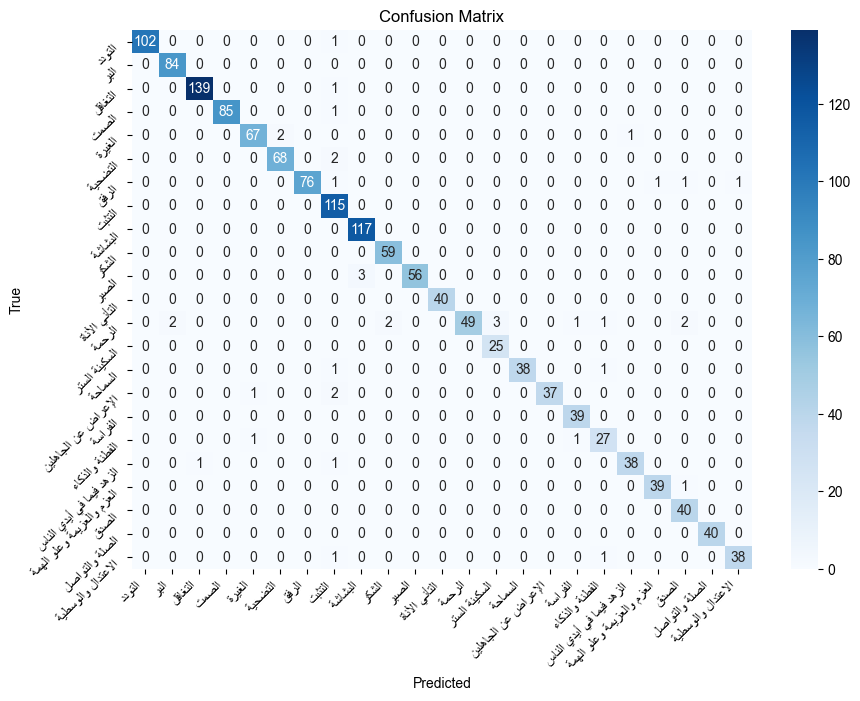

In [18]:
plt.rcParams['font.family'] = 'Arial'  # Set the font to DejaVu Sans

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[get_display(arabic_reshaper.reshape(label)) for label in data['Category'].unique()], 
            yticklabels=[get_display(arabic_reshaper.reshape(label)) for label in data['Category'].unique()])

# Set Arabic font for the labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
# Save the model and vectorizer for later use
import joblib

In [20]:
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')
joblib.dump(tfidf_vectorizer, 'decision_tree_model_tfidf_vectorizer.pkl')

['decision_tree_model_tfidf_vectorizer.pkl']

In [21]:
# Example prediction
example_sentence = ["أحيانًا تزداد الغيرة عندما نرى الآخرين يحققون ما نرغب في الوصول إليه"]
example_tfidf = tfidf_vectorizer.transform(example_sentence)
predicted_category = decision_tree_model.predict(example_tfidf)
print(f"Predicted Category: {predicted_category[0]}")

Predicted Category: التغافل
